In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]
!pip install --upgrade gym
!pip install ffmpeg
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 11.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 73.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        cv2_imshow(img_bgr)
        time.sleep(0.5)
        output.clear()


In [ ]:
env = gym.make('CliffWalking-v0',render_mode="human")
env.reset()


(36, {'prob': 1})

In [ ]:
import gym
env = gym.make("LunarLander-v2",render_mode="human")

In [ ]:
env.reset()
for i in range(100):
  next_state, reward, done,truncated , _= env.step(np.random.randint(0,4))


<ipython-input-8-c071f36e49eb>:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state = np.array(env.reset())


Streaming output truncated to the last 5000 lines.
  reward:  2.7672354682858726
  Avg. max timestep: 90.78
Episode 89
  reward:  1.4682151602886904
  Avg. max timestep: 90.25
Episode 89
  reward:  0.7746121487650555
  Avg. max timestep: 89.72
Episode 89
  reward:  1.8568914708070394
  Avg. max timestep: 89.19
Episode 89
  reward:  0.5749446444416833
  Avg. max timestep: 88.66
Episode 89
  reward:  -1.6712489727902085
  Avg. max timestep: 88.13
Episode 89
  reward:  1.24573268449073
  Avg. max timestep: 87.6
Episode 89
  reward:  -0.15856401452394947
  Avg. max timestep: 87.07
Episode 89
  reward:  1.5694785708030963
  Avg. max timestep: 86.54
Episode 89
  reward:  0.899269949159202
  Avg. max timestep: 86.01
Episode 89
  reward:  2.085951460921547
  Avg. max timestep: 85.48
Episode 89
  reward:  0.9554261503174188
  Avg. max timestep: 84.95
Episode 89
  reward:  1.4549874245838168
  Avg. max timestep: 84.42
Episode 89
  reward:  0.2686427301935737
  Avg. max timestep: 83.89
Episode 89

ValueError: ignored

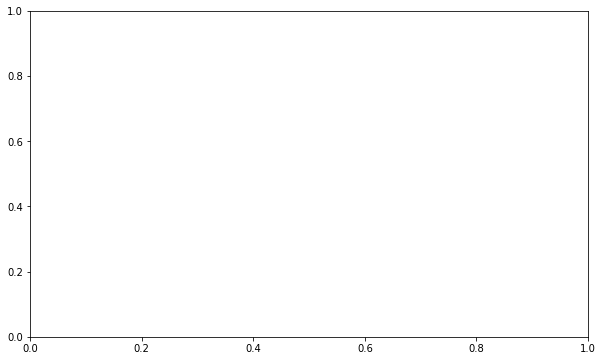

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

env = gym.make('LunarLander-v2' , render_mode = "human")
# Discretized state space dimensions
n_actions = env.action_space.n

# Initialize Q-table
from collections import defaultdict

Q = defaultdict(lambda: np.zeros(n_actions))


# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 100

# Helper function to discretize continuous state
import numpy as np

def state_extractor(s):
    s = np.array(s)
    s = s.tolist()
    state = (min(4, max(0, int((s[0]) / 0.5 * 4 + 4))),
             min(10, max(0, int((s[1]) / 0.2 * 10))),
             min(6, max(0, int((s[2]) / 0.2 * 6))),
             min(6, max(0, int((s[3]) / 0.2 * 6))),
             min(6, max(0, int((s[4]) / 0.2 * 6))),
             min(6, max(0, int((s[5]) / 0.2 * 6))),
             int(s[6]),
             int(s[7]))
    return state



# Helper function to choose an action based on epsilon-greedy policy
def choose_action(state, Q, epsilon):
    if np.random.uniform() < epsilon:
        # Choose random action
        action = env.action_space.sample()
    else:
        # Choose action with highest Q-value
        if state not in Q:
            Q[state] = np.zeros(n_actions)
        action = np.argmax(Q[state])
    return action
episode_rewards = []
max_timesteps = []
# SARSA algorithm
for i in range(num_episodes):
    state = np.array(env.reset())
    state = np.vectorize(state)
    action = choose_action(state, Q, epsilon)
    done = False
    video = None
    timesteps = 0
    episode_reward = 0

    
    while not done:

        next_state, reward, truncated,terminated, info = env.step(action)
        done = terminated or truncated 
        next_state = state_extractor(next_state)
        next_action = choose_action(next_state, Q, epsilon)
        
        if state not in Q:
            Q[state] = np.zeros(n_actions)
        if next_state not in Q:
            Q[next_state] = np.zeros(n_actions)
        Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

        state = next_state
        action = next_action
        episode_rewards += reward
        timesteps += 1
      #  episode_rewards.append(episode_reward)
        max_timesteps.append(timesteps)


        print(f"Episode {i+1}")
        print(f"  reward: " , reward)
        print(f"  Avg. max timestep: {np.mean(max_timesteps[-100:])}")

        
    # Print Q-table
    print(f"Episode {i+1}:")
    print(Q)
    
env.close()
# Plot episode vs. max-time step
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_episodes+1), max_timesteps)
plt.title('Episode vs. Max Time Step')
plt.xlabel('Episode')
plt.ylabel('Max Time Step')
plt.show()

# Plot episode vs. average-reward
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_episodes+1), np.array(episode_rewards))
plt.title('Episode vs. Average Reward')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.show()



In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

env = gym.make('LunarLander-v2', render_mode="human")

# Discretized state space dimensions
n_actions = env.action_space.n

# Initialize Q-table
Q = defaultdict(lambda: np.zeros(n_actions))

# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 100

# Helper function to discretize continuous state
def state_extractor(s):
    s = np.array(s)
    s = s.tolist()
    state = (min(4, max(0, int((s[0]) / 0.5 * 4 + 4))),
             min(10, max(0, int((s[1]) / 0.2 * 10))),
             min(6, max(0, int((s[2]) / 0.2 * 6))),
             min(6, max(0, int((s[3]) / 0.2 * 6))),
             min(6, max(0, int((s[4]) / 0.2 * 6))),
             min(6, max(0, int((s[5]) / 0.2 * 6))),
             int(s[6]),
             int(s[7]))
    return state

# Helper function to choose an action based on epsilon-greedy policy
def choose_action(state, Q, epsilon):
    if np.random.uniform() < epsilon:
        # Choose random action
        action = env.action_space.sample()
    else:
        # Choose action with expected Q-value
        if state not in Q:
            Q[state] = np.zeros(n_actions)
        probs = np.ones(n_actions) * epsilon / n_actions
        best_action = np.argmax(Q[state])
        probs[best_action] += 1.0 - epsilon
        action = np.random.choice(np.arange(n_actions), p=probs)
    return action

episode_rewards = []
max_timesteps = []

# Expected SARSA algorithm
for i in range(num_episodes):
    state = np.array(env.reset())
    state = np.vectorize(state)
    action = choose_action(state, Q, epsilon)
    done = False
    timesteps = 0
    episode_reward = 0

    while not done:
        next_state, reward, terminated,truncated, info = env.step(action)
        done = terminated or truncated
        next_state = state_extractor(next_state)
        next_action = choose_action(next_state, Q, epsilon)

        if state not in Q:
            Q[state] = np.zeros(n_actions)
        if next_state not in Q:
            Q[next_state] = np.zeros(n_actions)

        # Update Q-value using expected Q-value of next state and action
        expected_q = np.dot(Q[next_state], np.ones(n_actions) * epsilon / n_actions)
        best_action = np.argmax(Q[next_state])
        expected_q += (1.0 - epsilon) * Q[next_state][best_action]
        Q[state][action] += alpha * (reward + gamma * expected_q - Q[state][action])

        state = next_state
        action = next_action
        episode_reward += reward
        timesteps += 1

        print(f"Episode {i+1}")
        print(f"  reward: {reward}")
        print(f"  Avg. max timestep: {np.mean(max_timesteps[-100:])}")

    episode_rewards.append(episode_reward)
    max_timesteps.append(timesteps)

    # Print Q-table
   


<ipython-input-9-755f1634888e>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  state = np.array(env.reset())
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
  reward: -4.180098562306454
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -3.804954046841884
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -2.4471956967054664
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -0.5792611265520577
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -0.9274806031898948
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -3.0587334671629547
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -3.4446720608003134
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -3.190318954741484
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -3.7266708619793576
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -4.554706795492023
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -4.735170815896423
  Avg. max timestep: 135.85227272727272
Episode 89
  reward: -3.5752468414431915
  Avg. max timestep: 135.85227272